In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
import seaborn as sns
# Ajoutez le chemin du dossier parent à la variable d'environnement PYTHONPATH
parent_path = os.path.abspath("/Users/lucasinglese/Desktop/Challenge/6. CODES/FEATURES")
sys.path.append(parent_path)
from FeaturesLibrary import *
from Signals import *
from FeaturesImportance import *

# Data Import

In [3]:
# Import the data
eurusd = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_EURUSD.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
gbpusd = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_GBPUSD.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
usdcad = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_USDCAD.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
usdjpy = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_USDJPY.csv", parse_dates=True, index_col="time").iloc[0:5000,:]
usdchf = pd.read_csv("../DATA/4-hours Pepperstone/4-hours_USDCHF.csv", parse_dates=True, index_col="time").iloc[0:5000,:]

# Target Engineering

In [5]:
eurusd = future_DC_market_regime(eurusd,0.03)
gbpusd = future_DC_market_regime(gbpusd,0.03)
usdcad = future_DC_market_regime(usdcad,0.03)
usdjpy = future_DC_market_regime(usdjpy,0.03)
usdchf = future_DC_market_regime(usdchf,0.03)

# Features Engineering

In [4]:
def create_features(df):
    df = rolling_adf(df, "close", window_size=30)
    df = spread(df)
    df = kama_market_regime(df, "close", 60, 200)
    for i in [1,2,5,10,20,50]:
        df = auto_corr(df, "close", n=50, lag=i)
        df = log_transform(df, "close", i)
    df = derivatives(df,"close")
    df = candle_information(df)
    df = moving_yang_zhang_estimator(df, 200)
    df = moving_parkinson_estimator(df)
    
    return df

eurusd = create_features(eurusd.iloc[:-1,:])
gbpusd = create_features(gbpusd.iloc[:-1,:])
usdcad = create_features(usdcad.iloc[:-1,:])
usdjpy = create_features(usdjpy.iloc[:-1,:])
usdchf = create_features(usdchf.iloc[:-1,:])

In [4]:
gbpusd.iloc[3000:,:]

,open,high,low,close,tick_volume,low_time,high_time
time,,,,,,,
2016-11-16 20:00:00,1.24498,1.24651,1.24302,1.24338,20420,2016-11-16 22:24:00,2016-11-16 20:00:00
2016-11-17 00:00:00,1.24337,1.24547,1.24269,1.24299,16309,2016-11-17 02:48:00,2016-11-17 02:24:00
2016-11-17 04:00:00,1.24294,1.24375,1.24108,1.24339,19321,2016-11-17 04:48:00,2016-11-17 04:00:00
2016-11-17 08:00:00,1.24340,1.24780,1.24109,1.24769,24005,2016-11-17 09:36:00,2016-11-17 11:36:00
2016-11-17 12:00:00,1.24771,1.25044,1.24615,1.24750,31249,2016-11-17 13:36:00,2016-11-17 12:24:00
...,...,...,...,...,...,...,...
2018-02-22 16:00:00,1.38824,1.39588,1.38765,1.39381,75068,2018-02-22 16:00:00,2018-02-22 17:36:00
2018-02-22 20:00:00,1.39381,1.39892,1.39377,1.39506,35583,2018-02-22 20:00:00,2018-02-22 20:24:00
2018-02-23 00:00:00,1.39491,1.39608,1.39458,1.39563,15834,2018-02-23 03:36:00,2018-02-23 02:00:00


# Train/Test

In [5]:
eurusd_train = eurusd.iloc[:3000,:]
eurusd_test = eurusd.iloc[3000:,:]

gbpusd_train = gbpusd.iloc[:3000,:]
gbpusd_test = gbpusd.iloc[3000:,:]

usdcad_train = usdcad.iloc[:3000,:]
usdcad_test = usdcad.iloc[3000:,:]

usdjpy_train = usdjpy.iloc[:3000,:]
usdjpy_test = usdjpy.iloc[3000:,:]

usdchf_train = usdchf.iloc[:3000,:]
usdchf_test = usdchf.iloc[3000:,:]

# Features - Target Building

In [53]:
list_X = ["velocity", "acceleration", "candle_way", "filling", "spread", "tick_volume",
          'ret_log_1', 'ret_log_2', 'ret_log_5', 'ret_log_10',
       'ret_log_20', 'ret_log_50', 'autocorr_1', 'autocorr_2', 'autocorr_5',
       'autocorr_20',"autocorr_10", "kama_diff",
          "amplitude","rolling_volatility_yang_zhang", "rolling_volatility_parkinson",
         "kama_trend", "rolling_adf_stat"]
col_y = "future_market_regime"

# Correlation

In [54]:
# Make a copy of the dataframe and drop rows with NA values
correlations = []
assets = [eurusd_train, gbpusd_train, usdjpy_train, usdcad_train, usdchf_train]
for asset in assets:
    df_copy = asset[list_X + [col_y]].dropna()

    # Create feature matrix X and target vector y
    X = df_copy[list_X].iloc[:-1,:]
    y = df_copy[col_y].iloc[1:]

    dfc = pd.concat((X,y), axis=1)

    correlations.append(dfc.corr()["future_market_regime"])

In [55]:
correlation = pd.concat(correlations, axis=1)
correlation.columns = ["EURUSD", "GBPUSD", "USDJPY", "USDCAD", "USDCHF"]
correlation = correlation.transpose()
del correlation["future_market_regime"]
correlation = correlation.transpose()

In [56]:
correlation = pd.concat(correlations, axis=1)
correlation.columns = ["EURUSD", "GBPUSD", "USDJPY", "USDCAD", "USDCHF"]
correlation = correlation.transpose()
del correlation["future_market_regime"]
correlation = correlation.transpose()

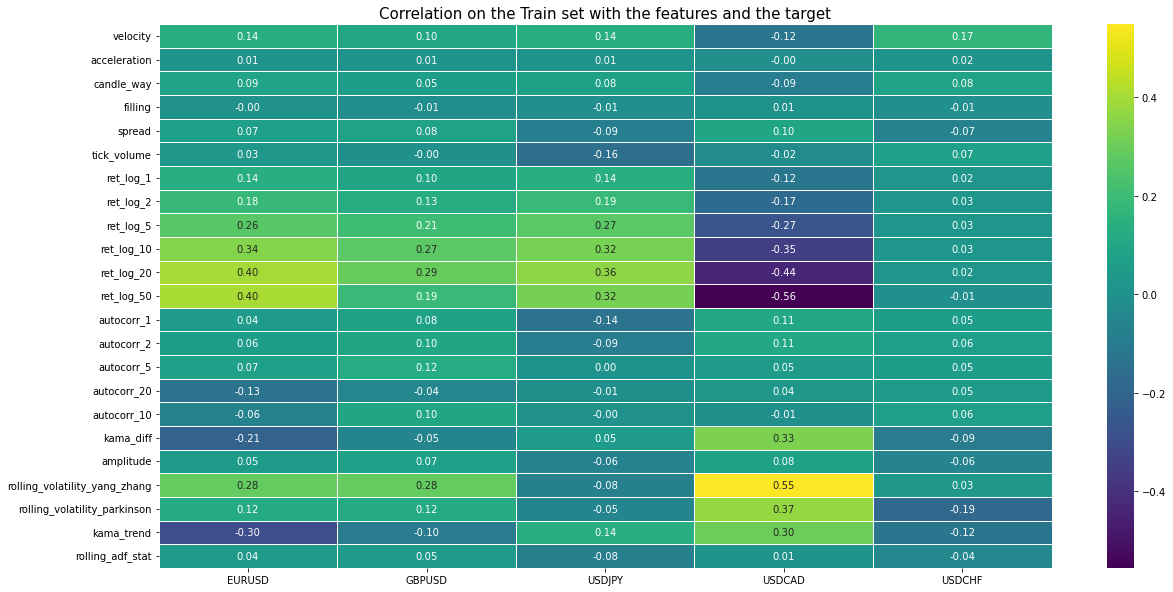

In [57]:
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='viridis', linewidths=.5)
plt.title("Correlation on the Train set with the features and the target", size=15)
plt.show()

We see that on the train set EURUSD, GBPUSD and USDPJY are well correlated on many things. <br>
USDCAD has also several good correlation but for USDCHF, we do not see a lot of good things.

# Features Importance

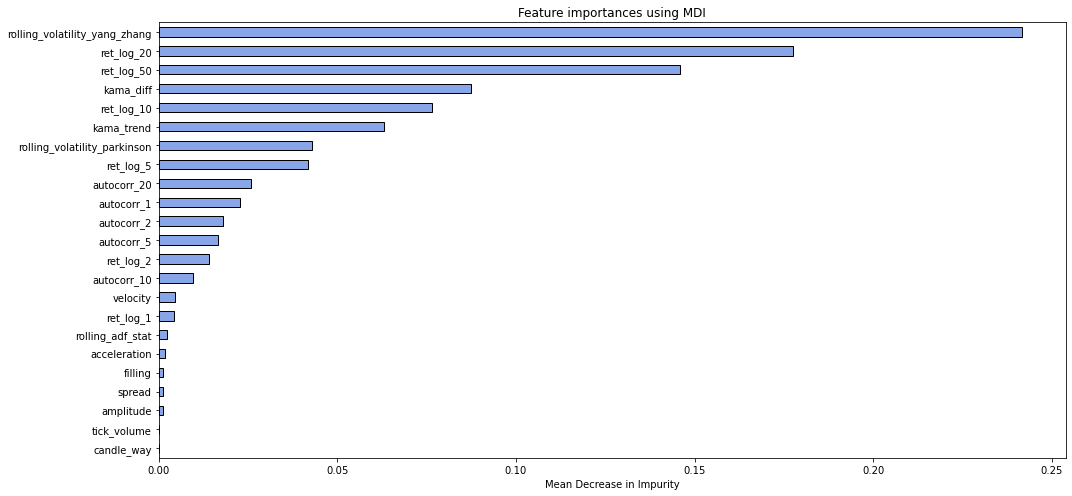

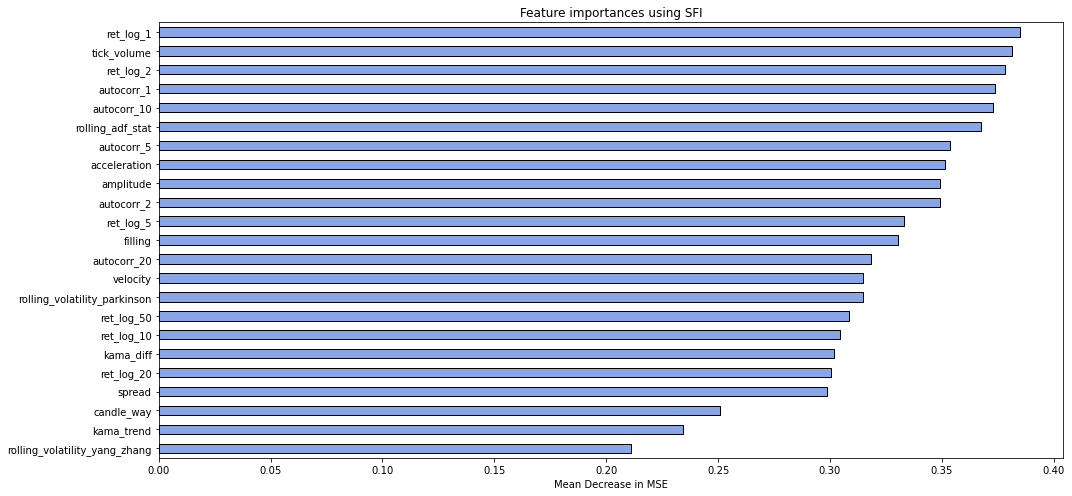

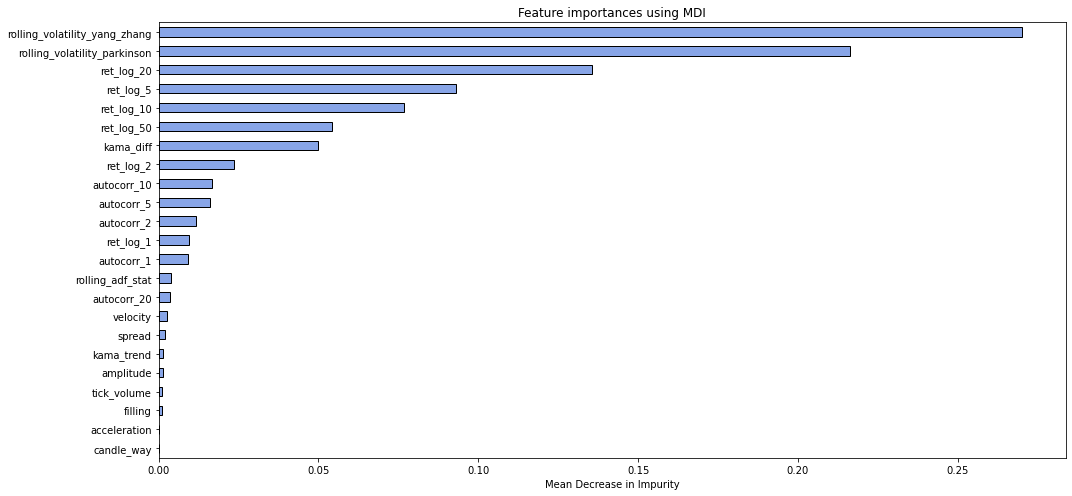

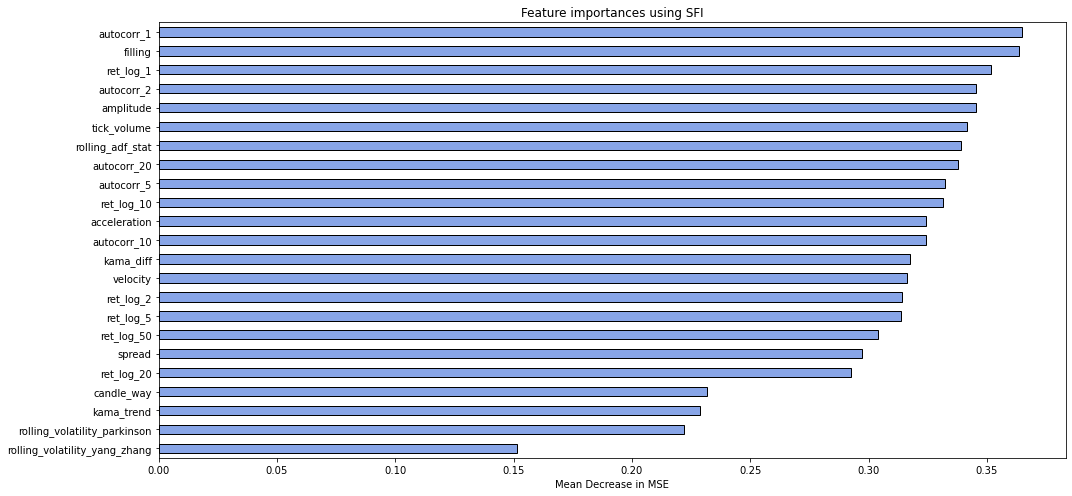

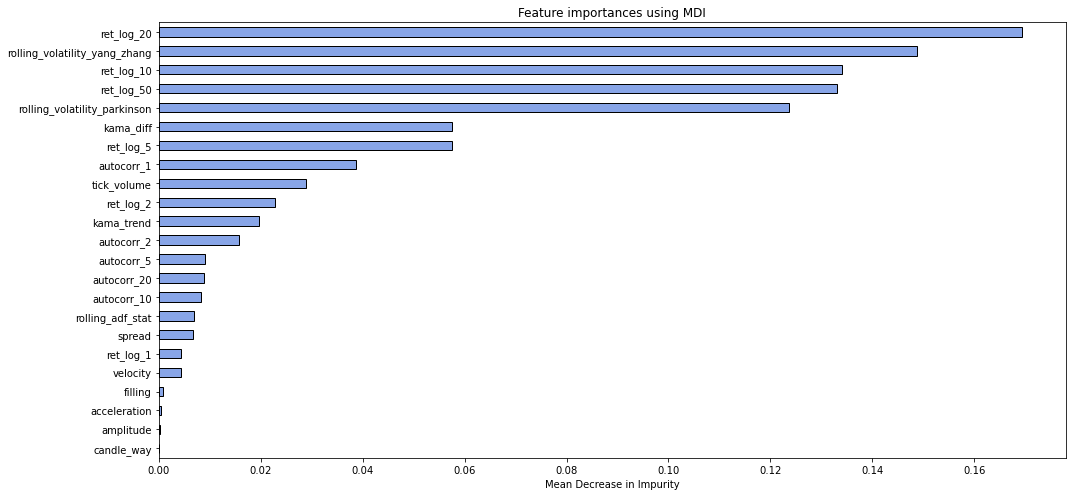

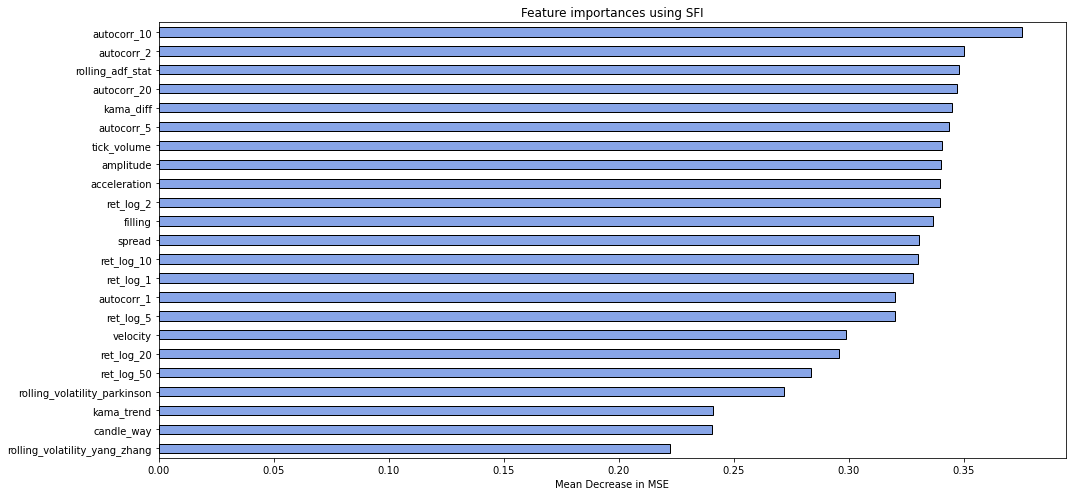

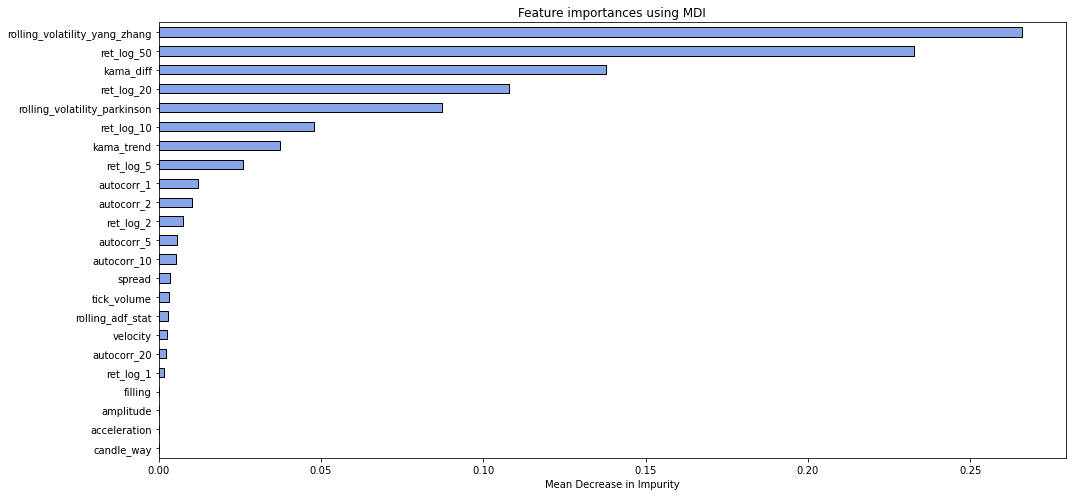

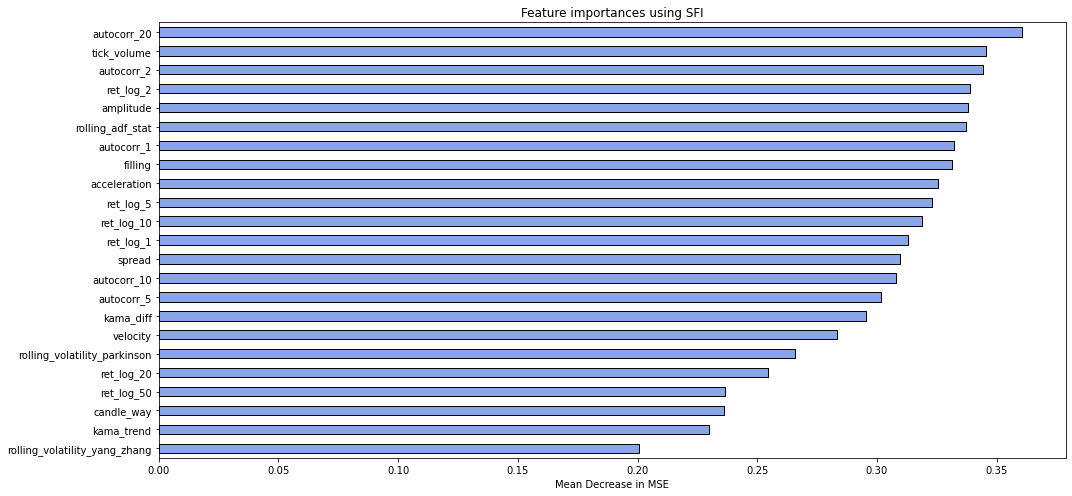

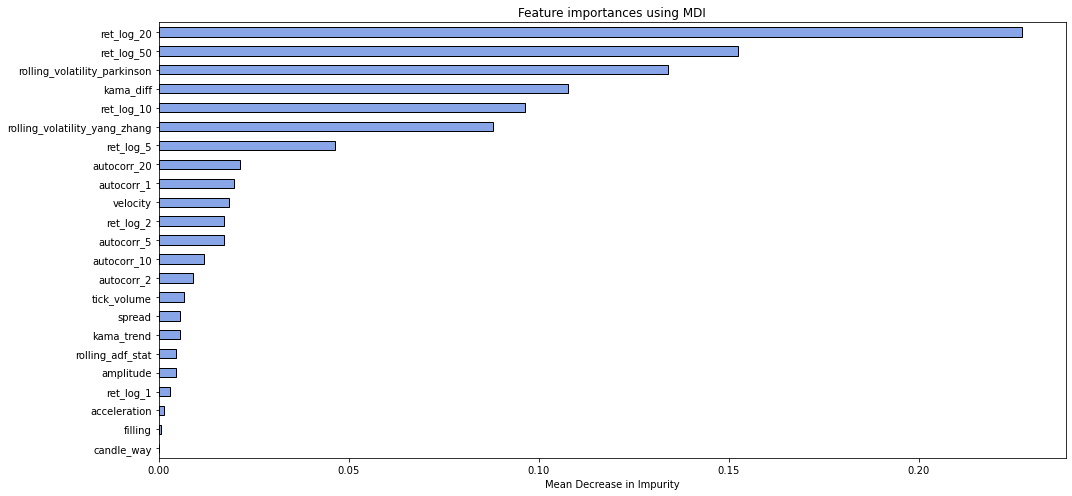

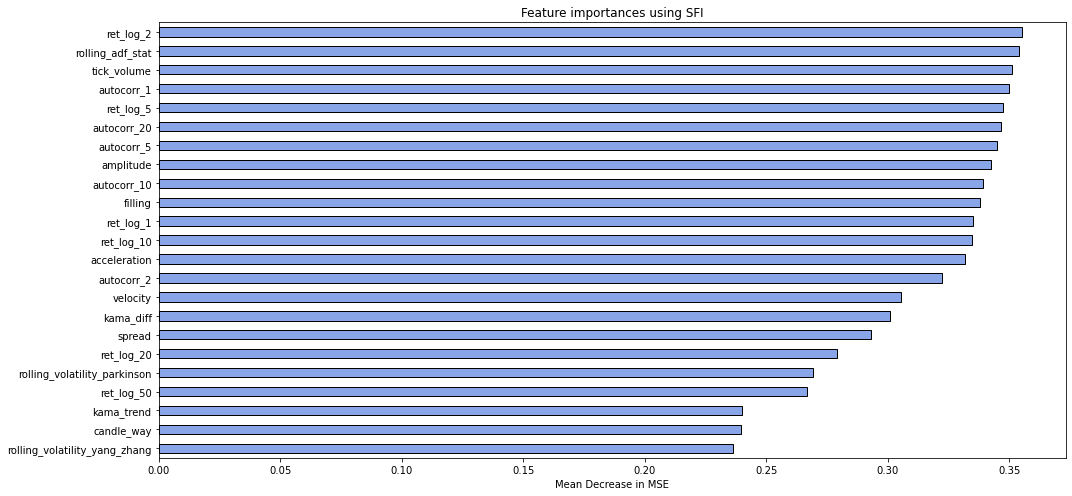

In [58]:
assets = [eurusd_train, gbpusd_train, usdjpy_train, usdcad_train, usdchf_train]
for asset in assets:
    feature_importance(asset, list_X, col_y, reg=False, mda=False)

# Model

In [66]:
df = pd.concat((eurusd_train, gbpusd_train, usdjpy_train), axis=0)
#df = usdcad_train
# Make a copy of the dataframe and drop rows with NA values
df_copy = df[list_X + [col_y]].dropna()
df_copy = df_copy[~np.isinf(df_copy).any(axis=1)]

# Create feature matrix X and target vector y
X = df_copy[list_X].iloc[:-1,:].values
y = df_copy[col_y].iloc[1:].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForest model
model = RandomForestClassifier(max_depth=3,random_state=42)

model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=42)

In [67]:
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

In [69]:
# Calcul de la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calcul de l'accuracy
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}")

# Calcul du score F1
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")


Confusion Matrix:
[[623 215]
 [207 588]]

Accuracy: 0.7416
F1 Score: 0.7359


# Robustness

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit

def plot_timeseries_cv_indices(cv, X, y, ax, n_splits, lw=5):
    """Visualize results of TimeSeriesSplit."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X, y)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0
        
        # Visualize the training and test sets
        ax.scatter(range(len(indices)), [ii + 0.5] * len(indices),
                   c=indices, marker="_", lw=lw, cmap='coolwarm_r', vmin=-0.2, vmax=1.2)
        
    # Visualize the targets
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker="_", lw=lw*6, cmap='RdYlGn', vmin=0, vmax=1)

    # Format the plot
    yticklabels = list(range(n_splits)) + ['target']
    ax.set(yticks=np.arange(n_splits + 1) + 0.5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel='CV iteration', 
           ylim=[n_splits + 1.6, -0.1], xlim=[0, len(X)])
    ax.set_title('TimeSeriesSplit', fontsize=15)
    return ax

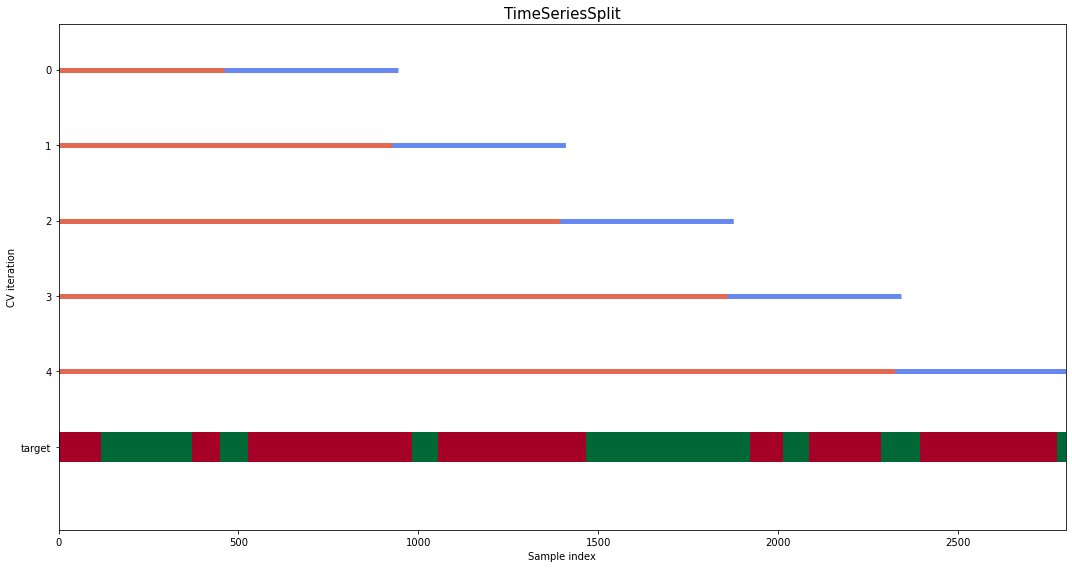

In [64]:
# Create the TimeSeriesSplit object
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Visualize the results
fig, ax = plt.subplots(figsize=(15, 8))
plot_timeseries_cv_indices(tscv, X, y, ax, n_splits)
plt.tight_layout()
plt.show()

In [70]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, TimeSeriesSplit

df = pd.concat((eurusd, gbpusd, usdjpy), axis=0)
#df = usdcad
# Make a copy of the dataframe and drop rows with NA values
df_copy = df[list_X + [col_y]].dropna()
df_copy = df_copy[~np.isinf(df_copy).any(axis=1)]

# Create feature matrix X and target vector y
X = df_copy[list_X].iloc[:-1,:].values
y = df_copy[col_y].iloc[1:].values

# Initialize classifier
clf = RandomForestClassifier(max_depth=3,random_state=42)

# K-Fold cross validation
tscv = TimeSeriesSplit(n_splits=5)
#kf = KFold(n_splits=k, shuffle=False)

# Collect scores
scores = cross_val_score(clf, X, y, cv=tscv, scoring="accuracy")

print(f"Scores for each fold: {scores}")
print(f"Average Accuracy: {np.mean(scores):.2f}")
print(f"Standard Deviation: {np.std(scores):.2f}")


Scores for each fold: [0.56355932 0.56525424 0.63686441 0.60127119 0.62627119]
Average Accuracy: 0.60
Standard Deviation: 0.03


# WARNINGS

We have really good results to predict the target BUT, it is not an optimal target for many reasons:
- If tommorrow we start a DC and today we are in a bullish trend it will not help us
- We should redefine the target but we do not have enough time, we need to go forward!
- Overfitting problems with the model


--> It seems that it is a predictable signal. So, you can work on that and to improve the target and check if the accuracy stay so high.
--> Take other curriencies to make a asset bagging to help have mroe robustness for usdcad

